<Figure size 432x289.861 with 0 Axes>

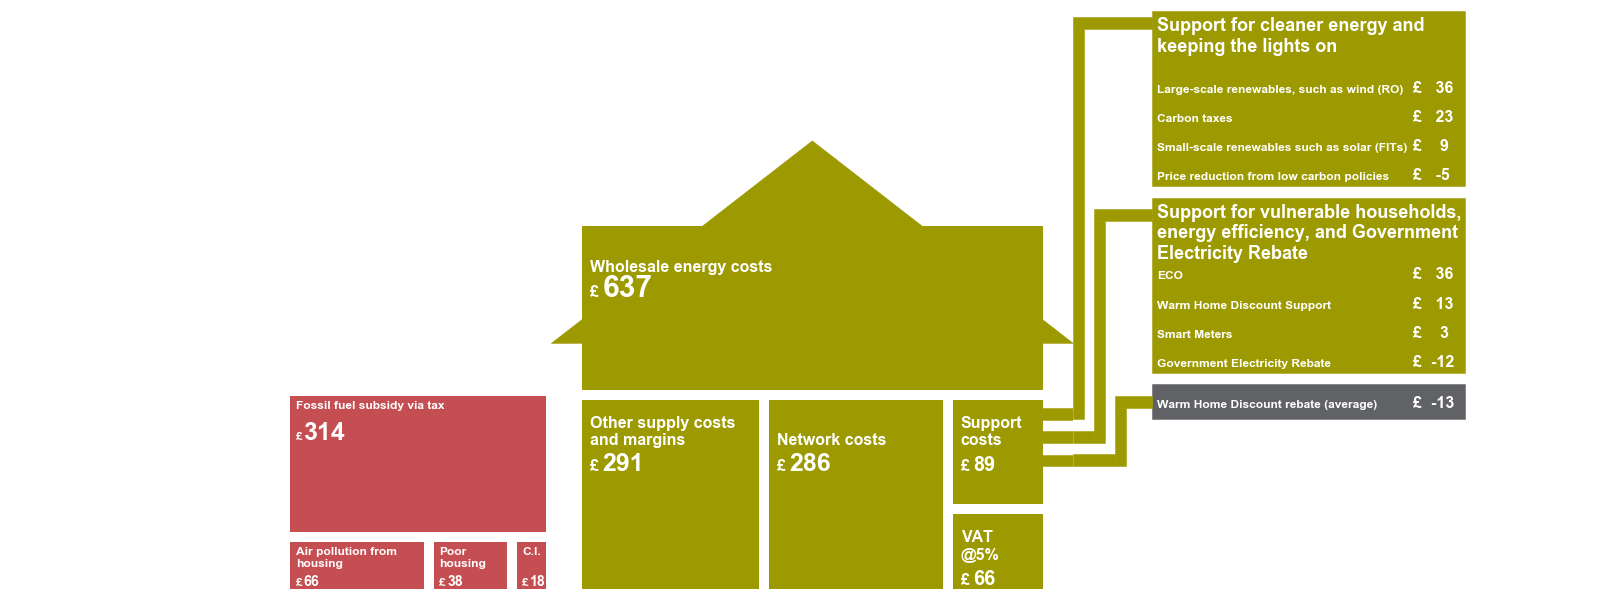

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify    
# pip install squarify (algorithm for treemap) 
# find location by running squarify in a notebook
# modify the following 4 lines of squarify code to rotate the treemap by 90degs 
#x = [rect["y"] for rect in rects]
#y = [-rect["x"] for rect in rects]
#dx = [rect["dy"] for rect in rects]
#dy = [-rect["dx"] for rect in rects]
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
# Activate Seaborn
sns.set()
# data
mutual_costs = {
    "Fossil fuel subsidy via tax": 314, 
    "Air pollution from housing":66,#cost of air pollution from housing
    "Poor housing":38,#cost of poor housing on health
    "C.I.":18}#climate impacts

UK_data_2014 = {
    "Wholesale energy costs":637,
    "Other supply costs and margins":291,
    "Network costs":286,
    "Support costs":89,    
    "VAT @5%":66
}
Support_Breakdown = {
    "Large-scale renewables, such as wind (RO)": 36, 
    "Carbon taxes":23, 
    "Small-scale renewables such as solar (FITs)": 9,    
    "Price reduction from low carbon policies":-5, 
    "ECO":36,  
    "Warm Home Discount Support":13, 
    "Smart Meters":3,   
    "Government Electricity Rebate":-12, 
    "Warm Home Discount rebate (average)":-13}

mutual = sum(mutual_costs.values())
household = sum(UK_data_2014.values()) 
subs = sum(Support_Breakdown.values()) 

# setting up scaling dimensions
total_costs = mutual+household
total_area = 100
b_house = 10
b_ext = 6

h_ext = (total_area * mutual/total_costs) / b_ext
b_subs = 4
h_subs = 3

# creating dataframes to play with
df1 = pd.DataFrame()
df1['Description'] = mutual_costs.keys()
df1['Costs'] = mutual_costs.values()
df2 = pd.DataFrame()
df2['Description'] = UK_data_2014.keys()
df2['Costs'] = UK_data_2014.values()
df3 = pd.DataFrame()
df3['Description'] = Support_Breakdown.keys()
df3['Costs'] = Support_Breakdown.values()
df3['AbsCosts'] = abs(df3.Costs)

# creating text labels for infographic
label_text1 = []
for row, col in df1.iterrows():
    #text = str(df1.loc[row,'Description'])+" £"+str(df1.loc[row,'Costs'])
    text = str(df1.loc[row,'Description'])
    label_text1.append(text)
label_text1
df1['Label'] = label_text1
df1

label_text2 = []
for row, col in df2.iterrows():
    #text = str(df2.loc[row,'Description'])+" £"+str(df2.loc[row,'Costs'])
    text = str(df2.loc[row,'Description'])
    label_text2.append(text)
label_text2
df2['Label'] = label_text2
df2

label_text3 = []
for row, col in df3.iterrows():
    text = str(df3.loc[row,'Description'])+" £"+str(df3.loc[row,'Costs'])
    label_text3.append(text)
label_text3
df3['Label'] = label_text3
df3
from textwrap import fill
labels1 = [fill(l, 15) for l in df1.loc[:,'Label']]
labels2 = [fill(l, 20) for l in df2.loc[:,'Label']]
labels3 = [fill(l, 20) for l in df3.loc[:,'Label']]

# generating squarify coordinates for house data
rect = squarify.squarify(df2['Costs'],0,0,np.sqrt(household),np.sqrt(household))
coords = pd.concat([
    pd.DataFrame.from_dict(rect[0],orient='index').T,
    pd.DataFrame.from_dict(rect[1],orient='index').T,
    pd.DataFrame.from_dict(rect[2],orient='index').T,
    pd.DataFrame.from_dict(rect[3],orient='index').T,
    pd.DataFrame.from_dict(rect[4],orient='index').T
],ignore_index=True)
coords
all_data = pd.concat([df2,coords],axis=1,sort=False)

# generating squarify coordinates for externalities data
rect_m = squarify.squarify(df1['Costs'],0,0,np.sqrt(mutual),np.sqrt(mutual))
coords_m = pd.concat([
    pd.DataFrame.from_dict(rect_m[0],orient='index').T,
    pd.DataFrame.from_dict(rect_m[1],orient='index').T,
    pd.DataFrame.from_dict(rect_m[2],orient='index').T,
    pd.DataFrame.from_dict(rect_m[3],orient='index').T,
],ignore_index=True)
coords_m
all_data_m = pd.concat([df1,coords_m],axis=1,sort=False)

font_size = []
for row, col in all_data.iterrows():
    if col[1] > 500:
        font_size.append(30)
    elif col[1] < 100:
        font_size.append(20)
    else:
        font_size.append(25)
font_size
all_data['font_size'] = font_size

font_size_m = []
for row, col in all_data_m.iterrows():
    if col[1] > 500:
        font_size.append(25)
    elif col[1] < 100:
        font_size_m.append(14)
    else:
        font_size_m.append(25)
font_size_m
all_data_m['font_size'] = font_size_m

wrapping = [25,20,25,12,5]
wrapping_m = [50,25,10,12]

all_data['wrapping'] = wrapping 
all_data_m['wrapping'] = wrapping_m

#Create plot 
plt.style.use('fivethirtyeight')
plt.figure(figsize= [b_ext,h_ext])
plt.rc('font', weight='bold')# controls default text sizes
plt.rc('text', color='w')

fig = plt.figure(figsize= [25,10])
fig.patch.set_facecolor('w')
fig.patch.set_alpha(0)

#split the plot into 3 axes on a grid
gs1 = gridspec.GridSpec(1, 3, figure=fig,wspace=0)
gs1.tight_layout(fig, rect=[0, 0, 1, 1],pad=0,w_pad=0,h_pad=0)

ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])

# generate tree map
squarify.plot(sizes=df1['Costs'],ax=ax1,norm_x=np.sqrt(mutual),norm_y=np.sqrt(mutual),color='r',linewidth='10',edgecolor=(1,1,1,0),alpha=1) #color = colors,
squarify.plot(sizes=df2['Costs'],ax=ax2,norm_x=37,norm_y=37, color='#9d9a01',linewidth='10',edgecolor=(1,1,1,0),alpha=1) #color = colors,

# lay out of axis to plot areas so that they are equivalent
ax1.set_xlim(-(41-np.sqrt(mutual)),np.sqrt(mutual))
ax1.set_ylim(-np.sqrt(mutual),37+2)
ax2.set_xlim(-2,37+2)
ax2.set_ylim(-37,np.sqrt(mutual))
ax3.set_xlim(-.15,.85)
ax3.set_ylim(0,1)

# transparent background
ax1.patch.set_facecolor('w')
ax1.patch.set_alpha(0)
ax2.patch.set_facecolor('w')
ax2.patch.set_alpha(0)
ax3.patch.set_facecolor('w')
ax3.patch.set_alpha(0)

# data labels for household energy
for row, col in all_data.iterrows():
    x = col[4]
    y = (-col[3])
    ax2.text(x+1,y-5,fill(col[0],col[8]),ha='left',va='baseline',fontsize=16)
    ax2.text(x+1,(y-7.5),'£ ',ha='left',va='baseline',fontsize=16)
    ax2.text(x+2,(y-7.5),col[1],ha='left',va='baseline',fontsize=col[7])

# data labels for externalities
for row, col in all_data_m.iterrows():
    x = col[4]
    y = (-col[3])
    ax1.text(x+0.8,y-1,fill(col[0],col[8]),ha='left',va='top',fontsize=12)
    ax1.text(x+0.8,(y-5),'£ ',ha='left',va='baseline',fontsize=12)
    ax1.text(x+1.4,(y-5),col[1],ha='left',va='baseline',fontsize=col[7])
    
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')


# disaggregated support costs with labels
ax3.text(0.01,.99,fill("Support for cleaner energy and keeping the lights on",35),ha='left',va='top',color='w',fontsize=18)
ax3.text(0.01,.67,fill("Support for vulnerable households, energy efficiency, and Government Electricity Rebate",35),ha='left',va='top',color='w',fontsize=18)

for row, col in df3.iterrows():
    if row in range(0,4):
        #print(row)
        x = col[0]
        y = col[1]
        #y = (-col[3])
        if len(str(y)) == 1:
            y = str('£    '+str(y))
            #print(str('£    '+str(y)))
        elif len(str(y)) == 2:
            y = str('£   '+str(y))
            #print(str('£   '+str(y)))
        elif len(str(y)) == 3:
            y = str('£  '+str(y))
        ax3.text(0.01,0.91-((1+row)/20),fill(col[0],45),ha='left',va='baseline',fontsize=12)
        ax3.text(.5,0.91-((1+row)/20),y,ha='left',va='baseline',fontsize=16)
    if row in range(4,8):  
        #print(row)
        x = col[0]
        y = col[1]
        if len(str(y)) == 1:
            y = str('£    '+str(y))
            #print(str('£    '+str(y)))
        elif len(str(y)) == 2:
            y = str('£   '+str(y))
            #print(str('£   '+str(y)))
        elif len(str(y)) == 3:
            y = str('£  '+str(y))
        ax3.text(0.01,.79-((1+row)/20),fill(col[0],45),ha='left',va='baseline',fontsize=12)
        ax3.text(0.5,.79-((1+row)/20),y,ha='left',va='baseline',fontsize=16)
    if row in range(8,9):  
        #print(row)
        x = col[0]
        y = col[1]
        if len(str(y)) == 1:
            y = str('£    '+str(y))
            #print(str('£    '+str(y)))
        elif len(str(y)) == 2:
            y = str('£   '+str(y))
            #print(str('£   '+str(y)))
        elif len(str(y)) == 3:
            y = str('£  '+str(y))
        ax3.text(0.01,.32,fill(col[0],40),ha='left',va='baseline',fontsize=12)
        ax3.text(0.5,.32,y,ha='left',va='baseline',fontsize=16)

#triangular roof
t2= plt.Polygon([[-2,-12.1], [(37)/2,8], [39,-12.1]], color='#9d9a01')
ax2.add_patch(t2)

#cleaner energy
t3= plt.Polygon([[0,0.7], [0,1], [.6,1],[.6,.7]], color='#9d9a01')
ax3.add_patch(t3)

#vulnerable groups
t4= plt.Polygon([[0,.38], [0,.68], [.6,.68],[.6,0.38]], color='#9d9a01')
ax3.add_patch(t4)

#rebate
t5= plt.Polygon([[0,0.3], [0,.36], [.6,.36],[.6,.3]], color='#616266')
ax3.add_patch(t5)

#arrows
a1= plt.Polygon([[-.15,.97], [-0.15,.99], [0,.99],[0,0.97]], color='#9d9a01')
a2= plt.Polygon([[-.15,.3], [-.15,.97], [-.13,.97],[-.13,0.3]], color='#9d9a01')
a3= plt.Polygon([[-.11,.64], [-.11,.66], [0,.66],[0,0.64]], color='#9d9a01')
a4= plt.Polygon([[-.11,.26], [-.11,.64], [-.09,.64],[-.09,0.26]], color='#9d9a01')
a5= plt.Polygon([[-.07,.32], [-.07,.34], [-0,.34],[0,0.32]], color='#9d9a01')
a6= plt.Polygon([[-.07,.22], [-.07,.32], [-.05,.32],[-.05,0.22]], color='#9d9a01')

a7= plt.Polygon([[-.15,.26], [-.15,.28], [-.11,.28],[-.11,0.26]], color='#9d9a01')
a8= plt.Polygon([[-.15,.22], [-.15,.24], [-.07,.24],[-.07,0.22]], color='#9d9a01')

ax3.add_patch(a1)
ax3.add_patch(a2)
ax3.add_patch(a3)
ax3.add_patch(a4)
ax3.add_patch(a5)
ax3.add_patch(a6)
ax3.add_patch(a7)
ax3.add_patch(a8)

yaxis_length = 37+np.sqrt(mutual)
x1 = 36
x2 = 39
y1 = -(0.32*yaxis_length)
y2 = y1 - (0.02*yaxis_length)
y21 = -(0.36*yaxis_length)
y22 = y21 - (0.02*yaxis_length)
y31 = -(0.40*yaxis_length)
y32 = y31 - (0.02*yaxis_length)

b1 =  plt.Polygon([[x1,y2], [x1,y1], [x2,y1],[x2,y2]], color='#9d9a01')
b2 =  plt.Polygon([[x1,y22], [x1,y21], [x2,y21],[x2,y22]], color='#9d9a01')
b3 =  plt.Polygon([[x1,y32], [x1,y31], [x2,y31],[x2,y32]], color='#9d9a01')
ax2.add_patch(b1)
ax2.add_patch(b2)
ax2.add_patch(b3)

plt.show()